# 1 Descriptive Statistics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data.csv


In [ ]:
import pandas as pd

df = pd.read_csv('train_data.csv')
df

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill
...,...,...,...,...
60110,60110,UAERES18030,"In this position, you will utilize your progr...",Responsibility
60111,60111,GERRES3026,"In addition, this individual will be responsib...",Responsibility
60112,60112,INDSSK5492,Good problem solving skills.,SoftSkill
60113,60113,PHESSK15092,Good Excel knowledge .,SoftSkill


In [ ]:
df.describe(include='object')

,Sentence_id,New_Sentence,Type
count,60115,59002,60115
unique,59704,57858,6
top,HONREQ4583,his is a dummy block of text And this is repre...,Responsibility
freq,2,852,15561


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60115 entries, 0 to 60114
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    60115 non-null  int64 
 1   Sentence_id   60115 non-null  object
 2   New_Sentence  59002 non-null  object
 3   Type          60115 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


## A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai??


Tipe data, nama kolom, dan isi dari dataset df sepertinya sudah sesuai kecuali kolom 'Unnamed: 0' karena memiliki nilai yang sebenarnya sama saja dengan nilai index. Maka dari itu seharusnya harus dihilangkan agar mengurangi dimensi data dan akhirnya variabel menjadi lebih relevan.

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df

,Sentence_id,New_Sentence,Type
0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,GERSKL27235,"Previous business experience, including but no...",Skill
4,HONSSK18415,Delivering fast and right the first time.,SoftSkill
...,...,...,...
60110,UAERES18030,"In this position, you will utilize your progr...",Responsibility
60111,GERRES3026,"In addition, this individual will be responsib...",Responsibility
60112,INDSSK5492,Good problem solving skills.,SoftSkill
60113,PHESSK15092,Good Excel knowledge .,SoftSkill


Dengan menghapus kolom 'Unnamed: 0', model menjadi lebih sederhana dan lebih mudah untuk dianalisis. Dengan memilih feature yang relevan, kita dapat meningkatkan kinerja model karena model hanya belajar dari informasi yang penting. Kemudian dengan lebih sedikitnya feature juga diharapkan proses pelatihan model dan inferensi menjadi lebih cepat.

## B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

Terdapat data yang kosong di kolom 'New_Sentence'. Dapat dilihat pada df.info() bahwa total jumlah nilai di setiap kolomnya adalah 60115, namun pada kolom 'New_Sentence' hanya terdapat 59002 saja.

## C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

Semua kolom punya nilai summary yang tidak aneh.

# 2 Univariate Analysis

In [ ]:
# Mengecek jumlah nilai yang terdapat pada masing-masing tipe
type_counts = df['Type'].value_counts()
print(type_counts)

Type
Responsibility    15561
Requirement       14132
SoftSkill          9581
Experience         9248
Skill              6956
Education          4637
Name: count, dtype: int64


In [ ]:
df.isna().sum()

,0
Sentence_id,0
New_Sentence,1113
Type,0


In [ ]:
# Menghapus baris dengan nilai kosong di kolom 'New_Sentence'
df1 = df.dropna(subset=['New_Sentence'])

# Mengecek jumlah nilai yang terdapat pada masing-masing tipe setelah drop nilai kosong di kolom 'New_Sentence'
type_counts1 = df1['Type'].value_counts()
print(type_counts1)

Type
Responsibility    15257
Requirement       13878
SoftSkill          9416
Experience         9078
Skill              6833
Education          4540
Name: count, dtype: int64


In [ ]:
df1.isna().sum()

,0
Sentence_id,0
New_Sentence,0
Type,0


In [ ]:
# Melihat duplikat di seluruh DataFrame
duplicates = df1[df1.duplicated(keep=False)]

print(duplicates)

duplicate_count = df1.duplicated().sum()
print(f"Jumlah total baris duplikat: {duplicate_count}")

       Sentence_id                                       New_Sentence  \
4495    UAEEXP9379  his is a dummy block of text And this is repre...   
7733   UAESSK14803  his is a dummy block of text And this is repre...   
25566    GERSSK226  his is a dummy block of text And this is repre...   
33606  UAESSK14803  his is a dummy block of text And this is repre...   
41130   UAEEXP9379  his is a dummy block of text And this is repre...   
46749    GERSSK226  his is a dummy block of text And this is repre...   

             Type  
4495   Experience  
7733    SoftSkill  
25566   SoftSkill  
33606   SoftSkill  
41130  Experience  
46749   SoftSkill  
Jumlah total baris duplikat: 3


In [ ]:
# Hasil DataFrame setelah penghapusan duplikat
df_cleaned = df1.drop_duplicates(subset=['New_Sentence'], keep='first')

duplicates = df_cleaned[df_cleaned.duplicated(keep=False)]

print(duplicates)

duplicate_count = df_cleaned.duplicated().sum()
print(f"Jumlah total baris duplikat: {duplicate_count}")

Empty DataFrame
Columns: [Sentence_id, New_Sentence, Type]
Index: []
Jumlah total baris duplikat: 0


Type
Responsibility    15008
Requirement       13625
SoftSkill          9174
Experience         8951
Skill              6690
Education          4410
Name: count, dtype: int64


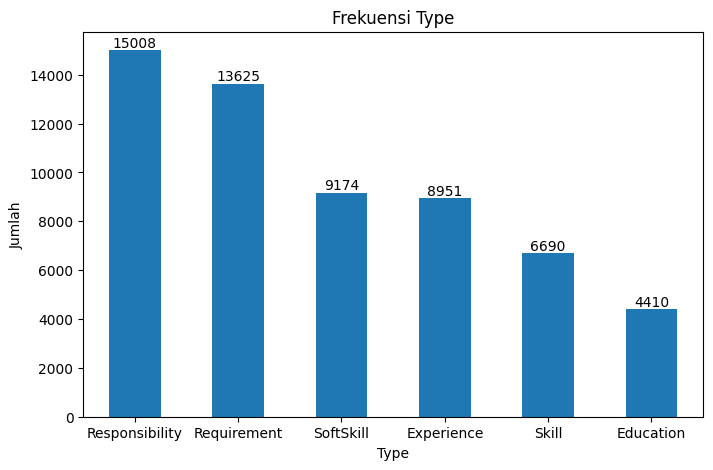

In [ ]:
import matplotlib.pyplot as plt

# Mengecek jumlah nilai yang terdapat pada masing-masing tipe setelah cleaning data
type_counts_cleaned = df_cleaned['Type'].value_counts()
print(type_counts_cleaned)

plt.figure(figsize=(8, 5))
bars = type_counts_cleaned.plot(kind='bar')
plt.title('Frekuensi Type')
plt.xlabel('Type')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             int(bar.get_height()),
             ha='center',
             va='bottom')
plt.show()

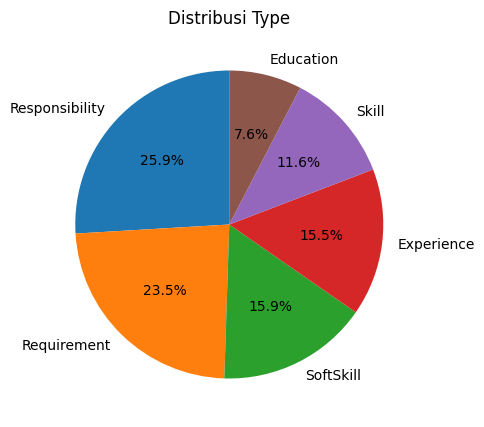

In [ ]:
plt.figure(figsize=(8, 5))
type_counts_cleaned.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Type')
plt.ylabel('')
plt.show()

Menghapus baris data dari semua kolom 'New_Sentence' yang kosong dan terduplikat ternyata berpengaruh kepada jumlah dari masing-masing tipe (jumlahnya berkurang dari masing-masing tipe). Dapat dilihat pada grafik Frekuensi Type bahwa yang mendominasi adalah tipe Responsibility dengan total nilai sebanyak 15008 atau menyumbang sebesar 25.9% dari keseluruhan data (Pie Chart pada Distribusi Type).
Hal ini menunjukkan bahwa perlunya ketelitian agar sebuah data yang diberikan menjadi lebih valid dan memberikan hasil yang akurat.

# 3 Multivariate Analysis

<ipython-input-24-360e88e7d9a9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Sentiment'] = df_cleaned['New_Sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)


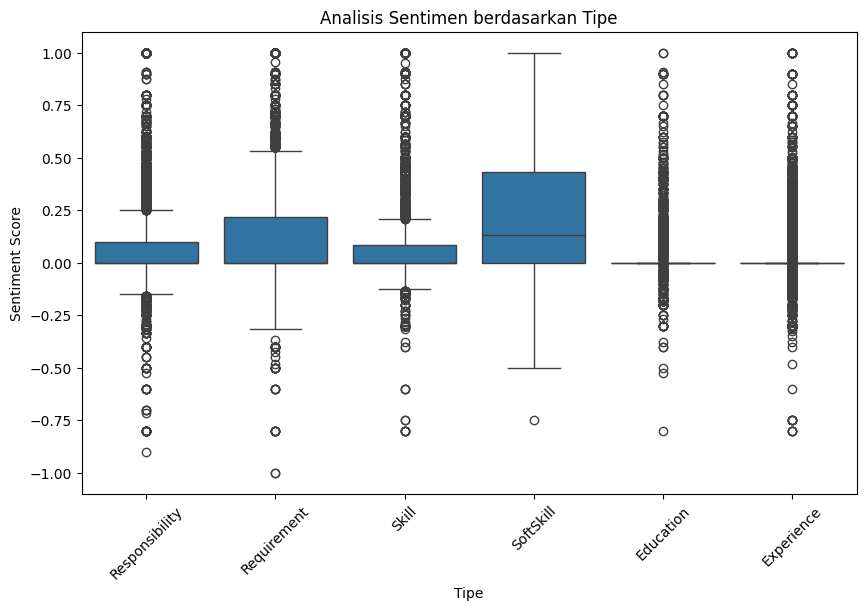

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Menghitung sentimen
df_cleaned.loc[:, 'Sentiment'] = df_cleaned['New_Sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualisasi Sentimen berdasarkan Tipe
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Sentiment', data=df_cleaned)
plt.title('Analisis Sentimen berdasarkan Tipe')
plt.xlabel('Tipe')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df_cleaned['Sentiment'].describe())

count    57858.000000
mean         0.107595
std          0.229303
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.160000
max          1.000000
Name: Sentiment, dtype: float64


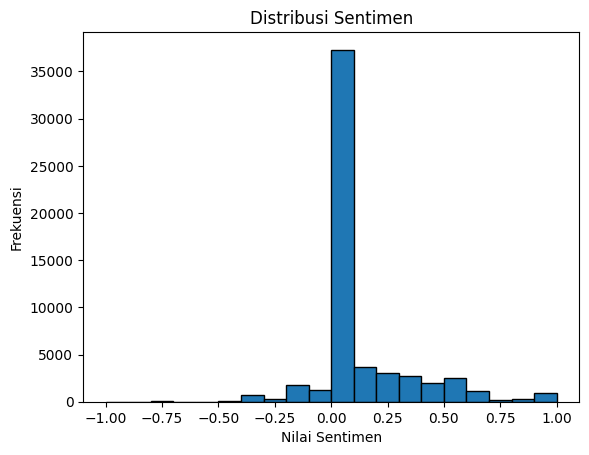

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_cleaned['Sentiment'], bins=20, edgecolor='k')
plt.title('Distribusi Sentimen')
plt.xlabel('Nilai Sentimen')
plt.ylabel('Frekuensi')
plt.show()

Kesimpulan Analisis Sentimen

1. Rata-rata nilai sentimen adalah 0.1075. Ini menunjukkan bahwa secara keseluruhan, sentimen dalam dataset cenderung positif, meskipun tidak terlalu kuat.
2. Standar deviasi sebesar 0.2293, ada variasi yang cukup signifikan dalam nilai sentimen. Ini menunjukkan bahwa ada beberapa kalimat dengan sentimen yang sangat positif dan beberapa yang sangat negatif.

Distribusi Nilai Sentimen:

1. Nilai sentimen terendah adalah -1, menunjukkan adanya kalimat dengan sentimen negatif yang kuat.
2. Nilai sentimen tertinggi adalah 1, menunjukkan kalimat dengan sentimen positif yang kuat.
3. 25% kalimat memiliki nilai sentimen 0 atau lebih rendah, menunjukkan bahwa banyak kalimat bersifat netral atau negatif.
4. Nilai median adalah 0, yang berarti setengah dari kalimat memiliki nilai sentimen netral atau negatif.
5. 75% kalimat memiliki nilai sentimen 0.16 atau lebih rendah, menunjukkan bahwa hanya sedikit kalimat yang memiliki sentimen positif yang signifikan.

Secara keseluruhan, meskipun rata-rata sentimen menunjukkan kecenderungan positif, banyak kalimat dalam dataset bersifat netral atau negatif. Hal ini mungkin menunjukkan bahwa meskipun ada beberapa kalimat yang positif, ada juga sejumlah besar kalimat yang tidak memberikan opini yang jelas atau negatif.

# 4 Business Insight

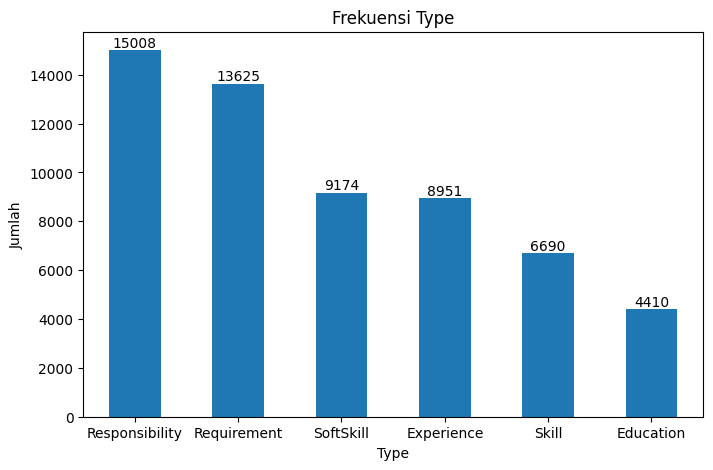

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = type_counts_cleaned.plot(kind='bar')
plt.title('Frekuensi Type')
plt.xlabel('Type')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             int(bar.get_height()),
             ha='center',
             va='bottom')
plt.show()

Dapat dilihat pada grafik di atas bahwa Responsibility dan Requirement memiliki frekuensi yang paling besar. Hal ini menunjukkan bahwa perlu expert khusus rekruiter untuk bidang 2 tipe pekerjaan tersebut agar proses rekrutmen di perusahaan akan berjalan secara efisien dan berkualitas.
Begitupun juga untuk tipe pekerjaan lainnya yang mungkin bisa disesuaikan jumlah expertnya berdasarkan frekuensi di atas.

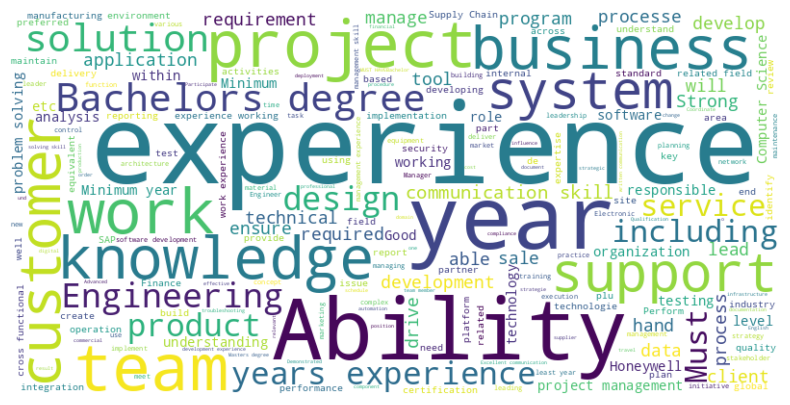

In [ ]:
# @title Teks judul default
from wordcloud import WordCloud, STOPWORDS

# Menggabungkan semua teks di kolom 'New_Sentence' menjadi satu string
teks = " ".join(review for review in df_cleaned['New_Sentence'].astype(str))

# menampilkan word cloud dengan memfilter stopwords
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis", stopwords=stopwords).generate(teks)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

- Dari gambar di atas dapat dilihat bahwa kata 'experience' sangat menonjol. Hal ini menunjukkan bahwa Ford cenderung mengutamakan pengalaman kerja pada deskripsi pekerjaan. Ford dapat membatasi persyaratan pengalaman ke dalam kategori tahun tertentu atau fokus pada keterampilan teknis utama yang sangat dibutuhkan, sehingga kandidat lebih mudah memahami apakah mereka cocok dengan peran tersebut.

- Kata seperti 'Bachelors degree' dan 'Engineering' mengindikasikan pentingnya kualifikasi pendidikan (minimal sarjana) dan latar belakang teknik. Ini bisa menunjukkan bahwa posisi tersebut memerlukan kompetensi teknis yang diperoleh dari pendidikan formal atau pengalaman di bidang teknik.

- Kata 'customer' dan 'support' menunjukkan bahwa fokus pada pengalaman pelanggan dan dukungan menjadi bagian penting dalam deskripsi pekerjaan. Dalam konteks rekrutmen, informasi ini harus jelas dan terfokus, sehingga kandidat yang memiliki pengalaman serupa dapat dengan cepat memahami peran yang mereka lamar tanpa harus membaca deskripsi panjang.

<h1>Life Cycle Data Science</h1>

Saving Data Science Life Cycle.png to Data Science Life Cycle (1).png


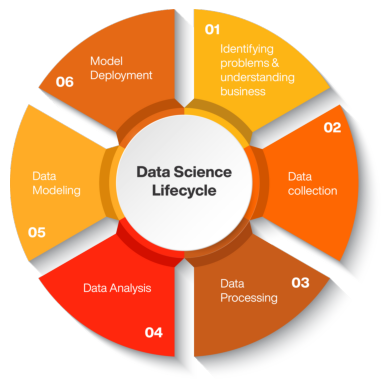

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Mengupload file gambar
uploaded = files.upload()

# Setelah diupload, kamu bisa menampilkan gambar
img = mpimg.imread('Data Science Life Cycle.png')  # Ganti dengan nama file yang sesuai
imgplot = plt.imshow(img)
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

<h2>Penjelasan Siklus Hidup Data Science</h2>

1. **Identifying Problems & Understanding Business:**
Pada tahap ini, penting untuk memahami konteks bisnis dan masalah yang ingin diselesaikan. Ini melibatkan diskusi dengan pemangku kepentingan untuk mendefinisikan tujuan dan harapan dari proyek. Memahami kebutuhan bisnis akan membantu menentukan pendekatan yang tepat dalam analisis data dan jenis data yang diperlukan.

2. **Data Collection:**
Setelah masalah diidentifikasi, tahap berikutnya adalah mengumpulkan data yang relevan. Data dapat diperoleh dari berbagai sumber, seperti database internal, file CSV, API, survei, atau sumber eksternal. Kualitas dan kuantitas data yang dikumpulkan akan sangat mempengaruhi hasil analisis.

3. **Data Processing:**
Pada tahap ini, data yang telah dikumpulkan akan diproses untuk menyiapkannya untuk analisis lebih lanjut. Ini mencakup pembersihan data, penghapusan duplikat, pengisian nilai yang hilang, dan konversi data ke dalam format yang sesuai. Pembersihan data yang baik adalah kunci untuk memastikan hasil analisis yang akurat dan dapat diandalkan.

4. **Data Analysis:**
Setelah data diproses, tahap selanjutnya adalah menganalisis data untuk menemukan pola, tren, dan wawasan. Analisis ini dapat melibatkan teknik statistik, visualisasi data, dan eksplorasi data untuk memahami karakteristik data lebih dalam. Tujuan dari analisis ini adalah untuk menggali informasi yang dapat membantu dalam pengambilan keputusan.

5. **Data Modeling:**
Di tahap ini, model analitik atau prediktif dibangun berdasarkan data yang telah dianalisis. Ini melibatkan pemilihan algoritma yang sesuai, melatih model dengan data pelatihan, dan menguji model untuk menilai akurasinya. Model yang efektif dapat membantu dalam memprediksi hasil di masa depan atau memberikan rekomendasi berdasarkan data yang ada.

6. **Model Deployment:**
Setelah model berhasil dibangun dan diuji, tahap terakhir adalah mengimplementasikan model dalam lingkungan produksi. Ini berarti model siap digunakan untuk memberikan hasil nyata dalam aplikasi bisnis. Selain itu, penting untuk memantau kinerja model secara berkala dan melakukan pemeliharaan jika diperlukan, memastikan bahwa model tetap relevan seiring berjalannya waktu.